In [0]:
import pandas as pd

In [0]:
data = pd.read_csv("https://raw.githubusercontent.com/equester/TataTelecomAI/master/Sample%20Data/cdr.csv")

In [4]:
data.head()

,Orig Rte,Orig Clli,Duration,HoldDuration,Seizure,Answer,Disconnect,Completion Code,Bounced Call,DiscInitiator,Group by 5 mins
0,-NULL-,defaultgwgw,00:08,00:08,27-02-2019 07:59,27-02-2019 07:59,27-02-2019 08:00,716-N7_NORMAL_CALL_CLEARING,No,1,2-27-2019 8:00:00
1,-NULL-,N9YA,42:04:00,42:05:00,27-02-2019 07:17,27-02-2019 07:17,27-02-2019 08:00,716-N7_NORMAL_CALL_CLEARING,No,1,2-27-2019 8:00:00
2,-NULL-,defaultgwgw,02:04,02:05,27-02-2019 07:57,27-02-2019 07:57,27-02-2019 08:00,716-N7_NORMAL_CALL_CLEARING,No,1,2-27-2019 8:00:00
3,-NULL-,defaultgwgw,00:00,00:02,27-02-2019 08:00,*** NO ANSWER ***,27-02-2019 08:00,716-N7_NORMAL_CALL_CLEARING,No,1,2-27-2019 8:00:00
4,SVWS,SVWB,98:09:00,98:10:00,27-02-2019 06:21,27-02-2019 06:21,27-02-2019 08:00,716-N7_NORMAL_CALL_CLEARING,No,1,2-27-2019 8:00:00


In [0]:
def TaggCompletionCode(eachValue):
    if eachValue == "716-N7_NORMAL_CALL_CLEARING":
        return 0
    else:
        return 1

In [0]:
data['Issue'] = data['Completion Code'].apply(TaggCompletionCode)

In [7]:
data.groupby('Group by 5 mins')['Completion Code'].max()

Group by 5 mins
2-27-2019 8:00:00    827-N7_INTERWORKING_UNSPECIFIED
2-27-2019 8:05:00    827-N7_INTERWORKING_UNSPECIFIED
2-27-2019 8:10:00    827-N7_INTERWORKING_UNSPECIFIED
2-27-2019 8:15:00    827-N7_INTERWORKING_UNSPECIFIED
2-27-2019 8:20:00    827-N7_INTERWORKING_UNSPECIFIED
2-27-2019 8:25:00    827-N7_INTERWORKING_UNSPECIFIED
2-27-2019 8:30:00    827-N7_INTERWORKING_UNSPECIFIED
2-27-2019 8:35:00    827-N7_INTERWORKING_UNSPECIFIED
2-27-2019 8:40:00       802-N7_RECOVERY_TIMER_EXPIRY
2-27-2019 8:45:00    827-N7_INTERWORKING_UNSPECIFIED
2-27-2019 8:50:00       802-N7_RECOVERY_TIMER_EXPIRY
2-27-2019 8:55:00       802-N7_RECOVERY_TIMER_EXPIRY
3-27-2019 7:00:00    827-N7_INTERWORKING_UNSPECIFIED
3-27-2019 7:05:00      741-N7_TEMPORARY_CALL_FAILURE
3-27-2019 7:10:00      741-N7_TEMPORARY_CALL_FAILURE
3-27-2019 7:15:00       802-N7_RECOVERY_TIMER_EXPIRY
3-27-2019 7:20:00          731-N7_NORMAL_UNSPECIFIED
3-27-2019 7:25:00       802-N7_RECOVERY_TIMER_EXPIRY
3-27-2019 7:30:00       802-N7

In [0]:
# data['Completion Code'][(data['Group by 5 mins']==Pivot_Issues.head(10)['DS'][0] ) & (data['Issue']==1)].max()

In [0]:
data.head()

,Orig Rte,Orig Clli,Duration,HoldDuration,Seizure,Answer,Disconnect,Completion Code,Bounced Call,DiscInitiator,Group by 5 mins,Issue
0,-NULL-,defaultgwgw,00:08,00:08,27-02-2019 07:59,27-02-2019 07:59,27-02-2019 08:00,716-N7_NORMAL_CALL_CLEARING,No,1,2-27-2019 8:00:00,0
1,-NULL-,N9YA,42:04:00,42:05:00,27-02-2019 07:17,27-02-2019 07:17,27-02-2019 08:00,716-N7_NORMAL_CALL_CLEARING,No,1,2-27-2019 8:00:00,0
2,-NULL-,defaultgwgw,02:04,02:05,27-02-2019 07:57,27-02-2019 07:57,27-02-2019 08:00,716-N7_NORMAL_CALL_CLEARING,No,1,2-27-2019 8:00:00,0
3,-NULL-,defaultgwgw,00:00,00:02,27-02-2019 08:00,*** NO ANSWER ***,27-02-2019 08:00,716-N7_NORMAL_CALL_CLEARING,No,1,2-27-2019 8:00:00,0
4,SVWS,SVWB,98:09:00,98:10:00,27-02-2019 06:21,27-02-2019 06:21,27-02-2019 08:00,716-N7_NORMAL_CALL_CLEARING,No,1,2-27-2019 8:00:00,0


In [8]:
data.pivot_table(index='Group by 5 mins', columns='Issue',aggfunc='count')['Completion Code']

Issue,0,1
Group by 5 mins,,
2-27-2019 8:00:00,454,19
2-27-2019 8:05:00,1726,378
2-27-2019 8:10:00,1827,1116
2-27-2019 8:15:00,1849,1348
2-27-2019 8:20:00,1078,639
2-27-2019 8:25:00,905,376
2-27-2019 8:30:00,1627,789
2-27-2019 8:35:00,542,253
2-27-2019 8:40:00,145,97


In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="whitegrid")

In [0]:
Pivot_Issues = data.pivot_table(index='Group by 5 mins', columns='Issue',aggfunc='count')['Completion Code']

In [11]:
sns.set(rc={'figure.figsize':(20,15)})
sns.lineplot(data=Pivot_Issues, )

AttributeError: ignored

In [0]:
Pivot_Issues['ds'] = Pivot_Issues.index

In [0]:
Pivot_Issues.rename(columns={1:'y'}, inplace=True)

In [15]:
Pivot_Issues.head(10)

Issue,0,y,DS,ds
Group by 5 mins,,,,
2-27-2019 8:00:00,454,19,2-27-2019 8:00:00,2-27-2019 8:00:00
2-27-2019 8:05:00,1726,378,2-27-2019 8:05:00,2-27-2019 8:05:00
2-27-2019 8:10:00,1827,1116,2-27-2019 8:10:00,2-27-2019 8:10:00
2-27-2019 8:15:00,1849,1348,2-27-2019 8:15:00,2-27-2019 8:15:00
2-27-2019 8:20:00,1078,639,2-27-2019 8:20:00,2-27-2019 8:20:00
2-27-2019 8:25:00,905,376,2-27-2019 8:25:00,2-27-2019 8:25:00
2-27-2019 8:30:00,1627,789,2-27-2019 8:30:00,2-27-2019 8:30:00
2-27-2019 8:35:00,542,253,2-27-2019 8:35:00,2-27-2019 8:35:00
2-27-2019 8:40:00,145,97,2-27-2019 8:40:00,2-27-2019 8:40:00


In [0]:
df = Pivot_Issues[['ds','y']].reset_index()

In [17]:
df.head()

Issue,Group by 5 mins,ds,y
0,2-27-2019 8:00:00,2-27-2019 8:00:00,19
1,2-27-2019 8:05:00,2-27-2019 8:05:00,378
2,2-27-2019 8:10:00,2-27-2019 8:10:00,1116
3,2-27-2019 8:15:00,2-27-2019 8:15:00,1348
4,2-27-2019 8:20:00,2-27-2019 8:20:00,639


In [19]:
df[['ds','y']].head()

Issue,ds,y
0,2-27-2019 8:00:00,19
1,2-27-2019 8:05:00,378
2,2-27-2019 8:10:00,1116
3,2-27-2019 8:15:00,1348
4,2-27-2019 8:20:00,639


In [0]:
dfnew = df[['ds','y']]

In [26]:
dfnew.shape

(36, 2)

In [21]:
from fbprophet import Prophet
m = Prophet()
m.fit(dfnew)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [22]:
future = m.make_future_dataframe(periods=10)
future.tail()

,ds
41,2019-04-02 09:55:00
42,2019-04-03 09:55:00
43,2019-04-04 09:55:00
44,2019-04-05 09:55:00
45,2019-04-06 09:55:00


In [23]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
41,2019-04-02 09:55:00,-243.039289,-563.856966,76.086205
42,2019-04-03 09:55:00,-169.276119,-487.192017,163.626993
43,2019-04-04 09:55:00,-268.168481,-584.628218,60.686971
44,2019-04-05 09:55:00,-274.148576,-588.268185,88.682918
45,2019-04-06 09:55:00,-287.308635,-598.574942,27.039577


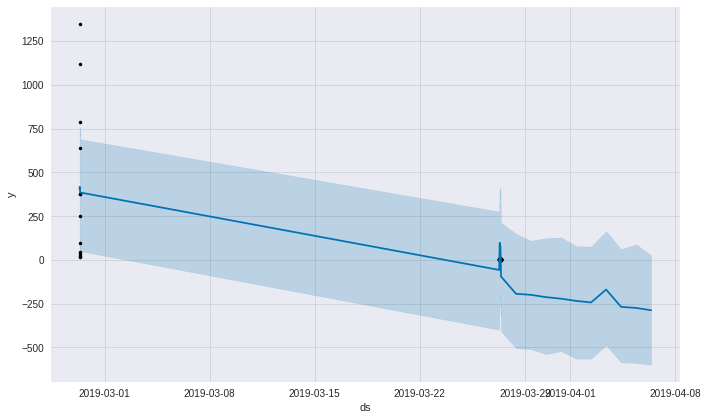

In [24]:
fig1 = m.plot(forecast)

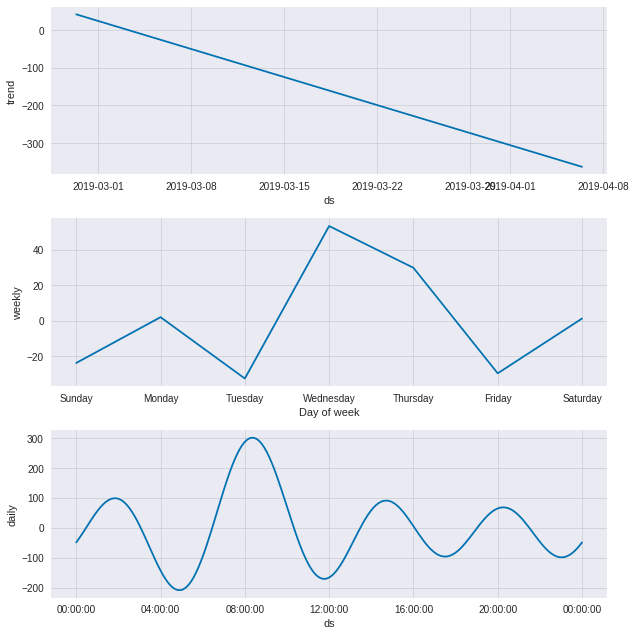

In [25]:
fig2 = m.plot_components(forecast)

In [0]:
Pivot_Issues.head(10)['DS'][0]

'2-27-2019 8:00:00'

In [0]:
data['Completion Code'][0]

'716-N7_NORMAL_CALL_CLEARING'

In [0]:
data['Completion Code'][(data['Group by 5 mins']==Pivot_Issues.head(10)['DS'][0] ) & (data['Issue']==1)].max()

'827-N7_INTERWORKING_UNSPECIFIED'

In [0]:
# Pivot_Issues.sort_values(by=[1],ascending=False)

In [0]:
data2 = pd.read_csv("sample_flat.txt",sep=';',header=None)

In [0]:
data2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,WV6C,2019-03-26 16:29:32,2019-03-26 16:27:51,919747921301,971558211714,7MQX05,FNMB,01:41,716-N7_NORMAL_CALL_CLEARING,INDIA [91]>A-C 9 [9]>...?>[747921301],Hold01:55,INDIA [91],INDIA [91]>A-C 9 [9],LCR India - Idea KL Mobile
1,WV6C,2019-03-26 16:29:32,2019-03-26 16:27:55,919846705332,78234128,7MQX05,WV6A,01:37,716-N7_NORMAL_CALL_CLEARING,INDIA [91]>A-C 9 [9]>...?>[846705332],Hold01:53,INDIA [91],INDIA [91]>A-C 9 [9],LCR India - Vodafone KL Mobile
2,WV6C,2019-03-26 16:29:32,2019-03-26 16:28:27,4982377686,366868587,2E6X25,LHXB,01:05,716-N7_NORMAL_CALL_CLEARING,GERMANY [49]>MUNICH [8]>NXX_2 [2]>[377686],Hold01:19,GERMANY [49],GERMANY [49]>MUNICH [8],LCR Germany - Other
3,WV6C,2019-03-26 16:29:32,2019-03-26 16:28:40,33635565238,33766556864,defaultgwgw,6UCX03,0:52,716-N7_NORMAL_CALL_CLEARING,FRANCE [33]>TOULOUSE [6]>NXX_3 [3]>[5565238],Hold01:00,FRANCE [33],FRANCE [33]>TOULOUSE [6],LCR France - SFR Mobile
4,WV6C,2019-03-26 16:29:32,2019-03-26 16:29:09,441275335024,33428080025,FNMG,58OX03,0:23,716-N7_NORMAL_CALL_CLEARING,UNITED KINGDOM [44]>CITY12X [127]>...?>[5335024],Hold0:45,UNITED KINGDOM [44],UNITED KINGDOM [44]>CITY12X [127],LCR United Kingdom - Other
5,WV6C,2019-03-26 16:29:32,2019-03-26 16:29:09,12063355970,2062798733,I5GX05,MTTD,0:23,716-N7_NORMAL_CALL_CLEARING,USA [1]>WASHINGTON [206]>...?>[3355970],Hold0:44,USA [1],USA [1]>WASHINGTON [206],LCR USA-LATA-00674-WA-RWP
6,WV6C,2019-03-26 16:29:32,2019-03-26 16:29:26,441656339692,35314380700,defaultgwgw,58OX03,0:06,716-N7_NORMAL_CALL_CLEARING,UNITED KINGDOM [44]>CITY16X [165]>...?>[6339692],Hold0:07,UNITED KINGDOM [44],UNITED KINGDOM [44]>CITY16X [165],LCR United Kingdom - Other
7,WV6C,2019-03-26 16:29:32,2019-03-26 16:29:27,18103859818,16094730809,I5GX05,TTTA,0:05,716-N7_NORMAL_CALL_CLEARING,USA [1]>MICHIGAN [810]>...?>[3859818],Hold0:33,USA [1],USA [1]>MICHIGAN [810],LCR USA-LATA-00340-MI-RWP
8,WV6C,2019-03-26 16:29:32,2019-03-26 16:29:27,864031192,393248849049,Z5OX25,NW8B,0:05,716-N7_NORMAL_CALL_CLEARING,NATIONAL CALL [0]>CITYXXX [8]>...?>[64031192],Hold0:06,NATIONAL CALL [0],NATIONAL CALL [0]>CITYXXX [8],LCR NATIONAL CALL [0]
9,WV6C,2019-03-26 16:29:32,2019-03-26 16:29:28,19032626927,,I5GX05,MTTD,0:04,716-N7_NORMAL_CALL_CLEARING,USA [1]>TEXAS [903]>...?>[2626927],Hold0:28,USA [1],USA [1]>TEXAS [903],LCR USA-LATA-00554-TX-RWP


In [0]:
data2[8]

0      716-N7_NORMAL_CALL_CLEARING
1      716-N7_NORMAL_CALL_CLEARING
2      716-N7_NORMAL_CALL_CLEARING
3      716-N7_NORMAL_CALL_CLEARING
4      716-N7_NORMAL_CALL_CLEARING
5      716-N7_NORMAL_CALL_CLEARING
6      716-N7_NORMAL_CALL_CLEARING
7      716-N7_NORMAL_CALL_CLEARING
8      716-N7_NORMAL_CALL_CLEARING
9      716-N7_NORMAL_CALL_CLEARING
10       731-N7_NORMAL_UNSPECIFIED
11     716-N7_NORMAL_CALL_CLEARING
12     716-N7_NORMAL_CALL_CLEARING
13       718-N7_NO_USER_RESPONDING
14     716-N7_NORMAL_CALL_CLEARING
15     716-N7_NORMAL_CALL_CLEARING
16     716-N7_NORMAL_CALL_CLEARING
17          701-UNALLOCATED_NUMBER
18     716-N7_NORMAL_CALL_CLEARING
19     716-N7_NORMAL_CALL_CLEARING
20     716-N7_NORMAL_CALL_CLEARING
21            721-N7_CALL_REJECTED
22            721-N7_CALL_REJECTED
23          701-UNALLOCATED_NUMBER
24     716-N7_NORMAL_CALL_CLEARING
25            721-N7_CALL_REJECTED
26          701-UNALLOCATED_NUMBER
27          701-UNALLOCATED_NUMBER
28          701-UNAL

In [0]:
data2['Issue'] = data2[8].apply(TaggCompletionCode)

In [0]:
data2

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Issue
0,WV6C,2019-03-26 16:29:32,2019-03-26 16:27:51,919747921301,971558211714,7MQX05,FNMB,01:41,716-N7_NORMAL_CALL_CLEARING,INDIA [91]>A-C 9 [9]>...?>[747921301],Hold01:55,INDIA [91],INDIA [91]>A-C 9 [9],LCR India - Idea KL Mobile,0
1,WV6C,2019-03-26 16:29:32,2019-03-26 16:27:55,919846705332,78234128,7MQX05,WV6A,01:37,716-N7_NORMAL_CALL_CLEARING,INDIA [91]>A-C 9 [9]>...?>[846705332],Hold01:53,INDIA [91],INDIA [91]>A-C 9 [9],LCR India - Vodafone KL Mobile,0
2,WV6C,2019-03-26 16:29:32,2019-03-26 16:28:27,4982377686,366868587,2E6X25,LHXB,01:05,716-N7_NORMAL_CALL_CLEARING,GERMANY [49]>MUNICH [8]>NXX_2 [2]>[377686],Hold01:19,GERMANY [49],GERMANY [49]>MUNICH [8],LCR Germany - Other,0
3,WV6C,2019-03-26 16:29:32,2019-03-26 16:28:40,33635565238,33766556864,defaultgwgw,6UCX03,0:52,716-N7_NORMAL_CALL_CLEARING,FRANCE [33]>TOULOUSE [6]>NXX_3 [3]>[5565238],Hold01:00,FRANCE [33],FRANCE [33]>TOULOUSE [6],LCR France - SFR Mobile,0
4,WV6C,2019-03-26 16:29:32,2019-03-26 16:29:09,441275335024,33428080025,FNMG,58OX03,0:23,716-N7_NORMAL_CALL_CLEARING,UNITED KINGDOM [44]>CITY12X [127]>...?>[5335024],Hold0:45,UNITED KINGDOM [44],UNITED KINGDOM [44]>CITY12X [127],LCR United Kingdom - Other,0
5,WV6C,2019-03-26 16:29:32,2019-03-26 16:29:09,12063355970,2062798733,I5GX05,MTTD,0:23,716-N7_NORMAL_CALL_CLEARING,USA [1]>WASHINGTON [206]>...?>[3355970],Hold0:44,USA [1],USA [1]>WASHINGTON [206],LCR USA-LATA-00674-WA-RWP,0
6,WV6C,2019-03-26 16:29:32,2019-03-26 16:29:26,441656339692,35314380700,defaultgwgw,58OX03,0:06,716-N7_NORMAL_CALL_CLEARING,UNITED KINGDOM [44]>CITY16X [165]>...?>[6339692],Hold0:07,UNITED KINGDOM [44],UNITED KINGDOM [44]>CITY16X [165],LCR United Kingdom - Other,0
7,WV6C,2019-03-26 16:29:32,2019-03-26 16:29:27,18103859818,16094730809,I5GX05,TTTA,0:05,716-N7_NORMAL_CALL_CLEARING,USA [1]>MICHIGAN [810]>...?>[3859818],Hold0:33,USA [1],USA [1]>MICHIGAN [810],LCR USA-LATA-00340-MI-RWP,0
8,WV6C,2019-03-26 16:29:32,2019-03-26 16:29:27,864031192,393248849049,Z5OX25,NW8B,0:05,716-N7_NORMAL_CALL_CLEARING,NATIONAL CALL [0]>CITYXXX [8]>...?>[64031192],Hold0:06,NATIONAL CALL [0],NATIONAL CALL [0]>CITYXXX [8],LCR NATIONAL CALL [0],0
9,WV6C,2019-03-26 16:29:32,2019-03-26 16:29:28,19032626927,,I5GX05,MTTD,0:04,716-N7_NORMAL_CALL_CLEARING,USA [1]>TEXAS [903]>...?>[2626927],Hold0:28,USA [1],USA [1]>TEXAS [903],LCR USA-LATA-00554-TX-RWP,0


In [0]:
data2.pivot_table(index=5, columns='Issue',aggfunc='count')[6]

Issue,0,1
5,,
0BTX55,9.0,NaN
2E6X15,1.0,NaN
2E6X25,20.0,12.0
3UOX15,1.0,NaN
58OX05,3.0,NaN
5JZX05,14.0,3.0
5MEX05,7.0,4.0
5Q0X15,4.0,4.0
7MQX05,5.0,1.0
